#문제 설명

노드의 순서를 바꾸시오! 단 값의 변화 없이! ex) +-이런식으로 노드 값 자체를 바꾸면 X

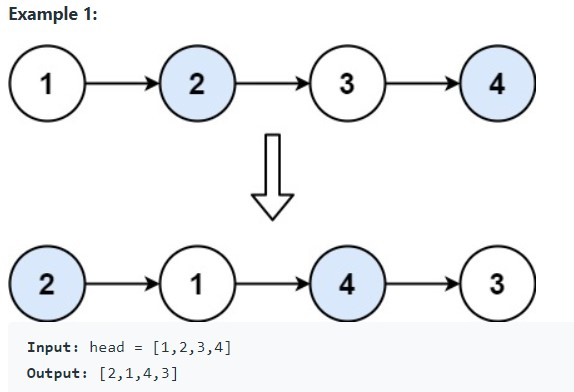

#각자 푼 방식

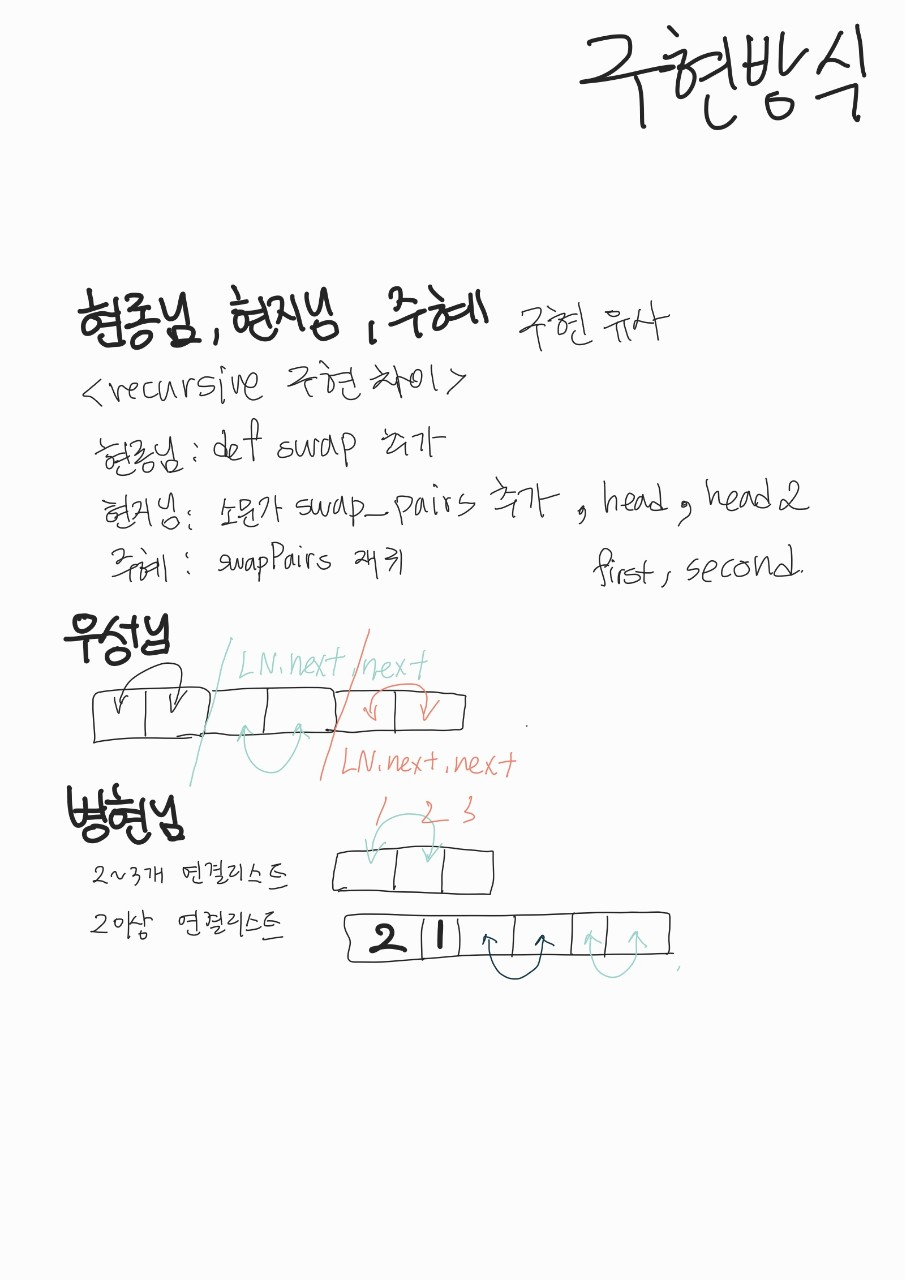

# 코드설명

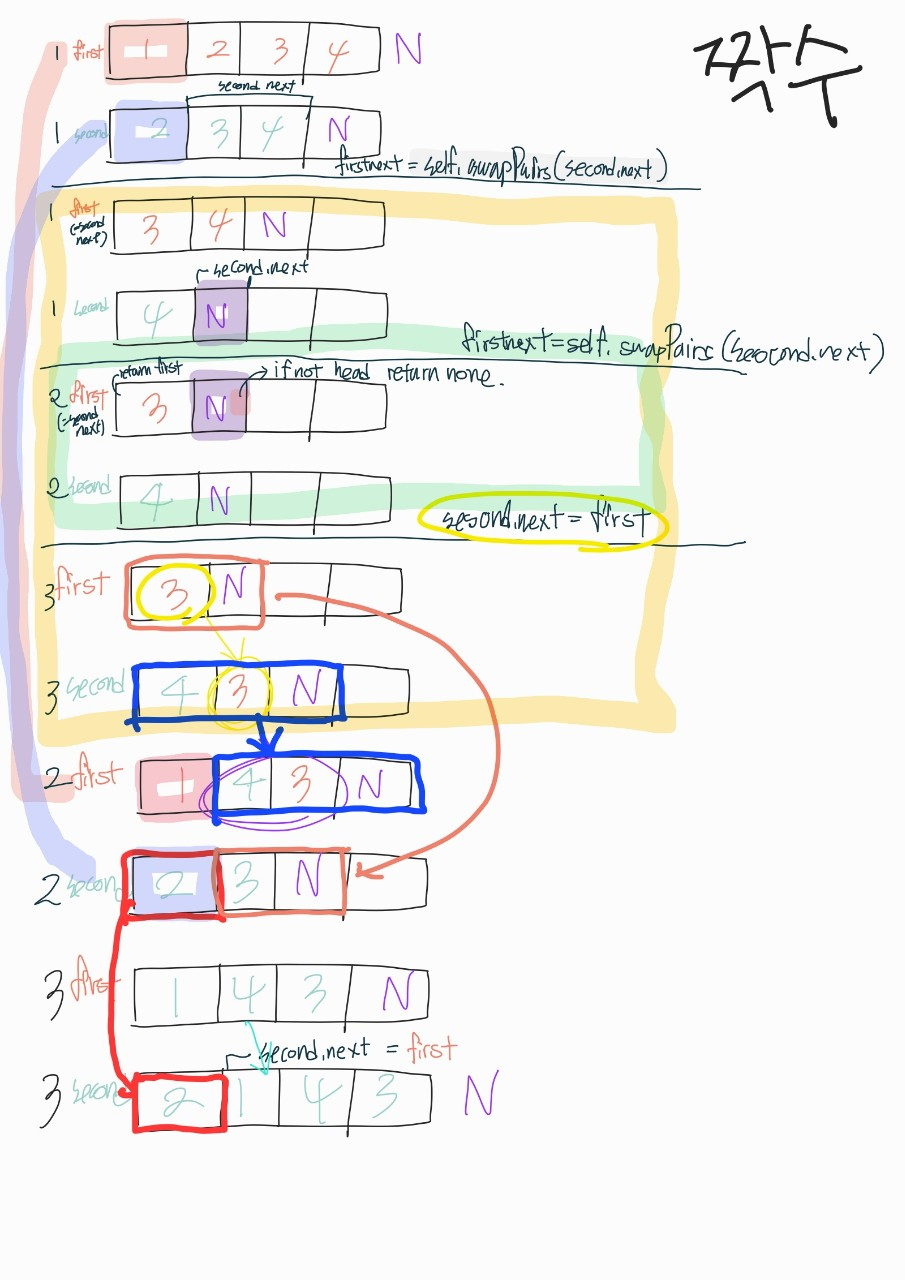

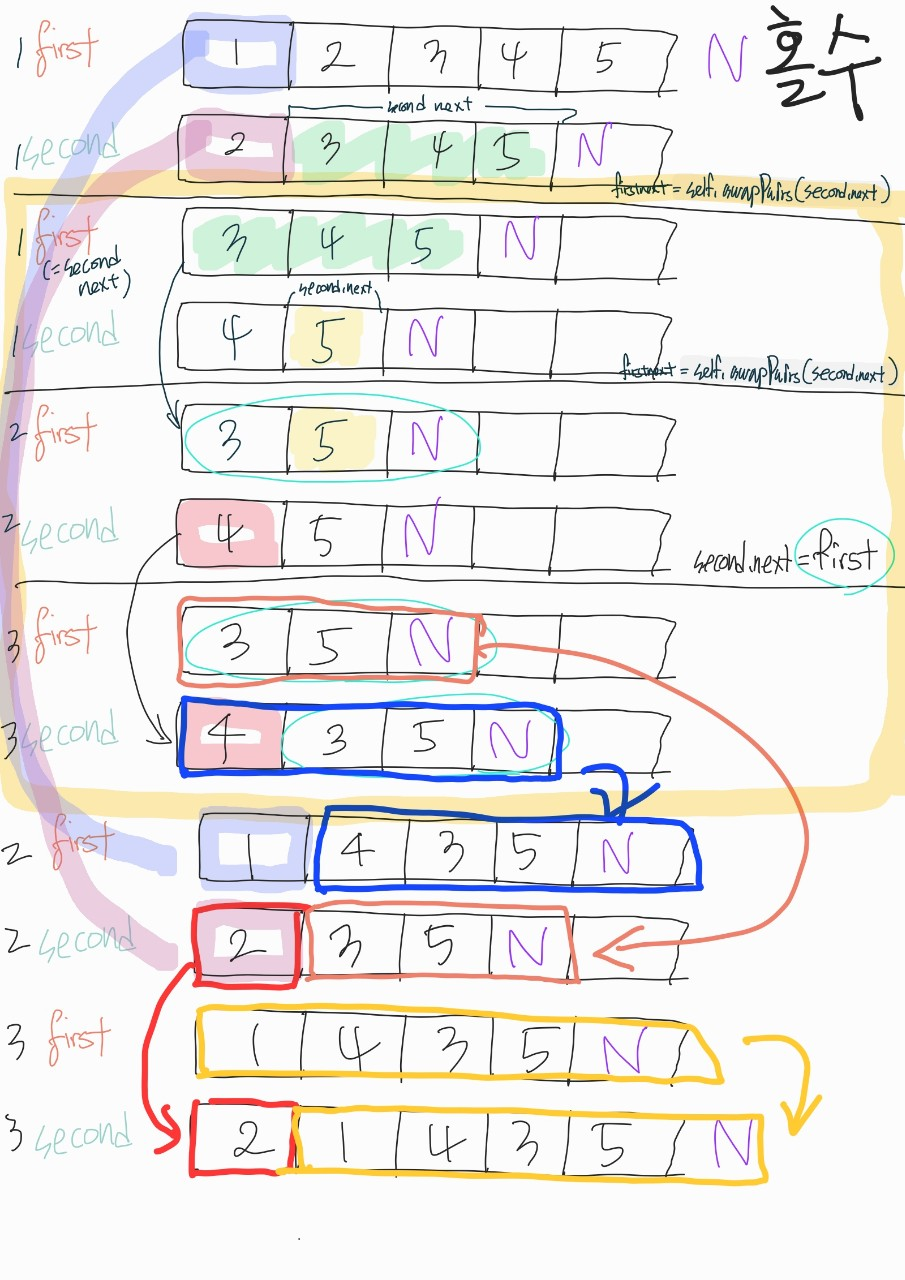

주혜코드

In [ ]:
# 값을 바꾸면 안되므로, next 함수를 사용해 합침
class Solution:
    def swapPairs(self, head: Optional[ListNode]) -> Optional[ListNode]:   
        if not head:
            return None
        first = head 
        
        if not first.next:
            return first  
        
        second = first.next   
        #1
        first.next = self.swapPairs(second.next)
        #2 
        second.next = first 
        print(first)
        print(second)
        #3
        return second

'''
이건 제 코드입니다. :>
'''
        

현종님코드

In [ ]:
class Solution(object):
    def swap(self, head):
        # 두 칸씩 이동하며 swap 진행
        # 종료 조건 : 앞의 두 칸에 아무것도 없을 경우
        if head == None or head.next == None:
            # head return : None
            return head
        else:
            # 앞의 두칸에 노드가 있는 경우
            second = head.next
            head.next = self.swapPairs(second.next)
            # head.next를 second에 붙히고
            second.next = head
            # second.next를 head에 붙히면 된다.
            return second
    def swapPairs(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        return self.swap(head)
    
## 호출 순서는 다음과 같다
## 1 -> 2 -> 3 -> 4
## 3 -> 4 호출 까지 재귀적으로 가고 
## head가 4.next일 때 None return
## head가 3인 상황에서 head(3).next = none, second(4).next = head(3) 이 된다. 그리고 return second(4 -> 3)
## head가 1인 상황에서 head(1).next = second(4 -> 3), second(2).next = head(1 -> 4 ->3)
## 그러면 이쁘게 2 -> 1 -> 4 -> 3이 형성된다.

'''
피드백 : 함수 안 함수를 호출하는 방식의 재귀도 시도해보시면 좋을 것 같습니다.
+ 제가 간단히 돌려본 결과로는 비교적 빠른 런타임을 가진 코드임이 인상깊었습니다.

'''

우성님코드

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def swap(self, LN):
        # 4) 종료 조건:
        #    - 진행하다가 들어온 게 없어서 -> 바꿀 게 없거나
        #    - 두 번째 값이 없어서 -> 바꿀 필요가 없으면
        if (LN == None) or (LN.next) == None: return

        # LN.val은 첫 번째 값,
        # LN.next.val은 두 번째 값을 뜻함
        
        # 1) 그 둘의 자리를 바꾸고
        LN.val, LN.next.val = LN.next.val, LN.val

        # 2) 그 두 개 건너 뛰고 나머지에 대해
        LN = LN.next.next
        
        # 3) swap 진행
        self.swap(LN)

    def swapPairs(self, head):
        self.swap(head)
        return head
'''
피드백 : 함수 하나만 사용하는 방식의 재귀도 시도해보시면 좋을 것 같습니다.
+ 노드끼리 바꾼다는 개념이 흥미로웠습니다.(노드변화없이 앞뒤로 붙이는 방법도 시도해보세요!)

'''

병현님코드

In [ ]:
class Solution:
    def solution(self, head):
        # 재귀를 하다가 head가 None인 경우, head 다음이 None인 경우, Head 다다음이 None인경우
        # swap을 하다가 하나 이하가 남는다면 그건 처리 X입니다.
        if head == None or head.next == None or head.next.next == None:
            return
        
        # 반면 뒤에 swap 대상이 있다면
        # 우선 swap 대상을 저장해줍니다.
        # 2-1-3-4-5-6 이 들어왔고, head가 1을 가르키고 있는 경우
        # tmp에는 5가 저장됩니다.
        tmp = None
        if head.next.next != None:
            tmp = head.next.next.next
        # 2-1-3-4-5-6에서 3과 4의 자리를 교환해줍니다.
        head.next, head.next.next = head.next.next, head.next
        # 그 다음 3에 5를 연결하여
        # 2-1-4-3-5-6을 만들어 줍니다.
        head.next.next.next = tmp
        # 그 다음 3을 재귀함수의 head로 넣어줍니다.
        self.solution(head.next.next)
    
    
    # 전체적인 코드는 1-2-3-4-5-6을 예시로 들겠습니다.
    def swapPairs(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # 만약 head가 None이거나 하나짜리라면 계산할 필요가 없습니다.
        if head == None or head.next == None:
            return head
        
        # 3을 tmp로 저장합니다.
        tmp = head.next.next
        # 1과 2를 바꿉니다.
        head, head.next = head.next, head
        # tmp를 연결하여 2-1-3-4-5-6짜리 연결 리스트를 만듭니다.
        head.next.next = tmp
        # 만약 두 개짜리 연결리스트거나 3개짜리라면 더 이상 계산할 필요가 없습니다.
        if tmp != None:
            if tmp.next != None:
                # 하지만 3개를 초과하는 연결리스트라면 계산을 해야 합니다.
                # 2-1-3-4-5-6에서 1을 재귀함수에 넣어줍니다.
                self.solution(head.next)
        return head
'''
피드백 : 함수 하나만 사용하는 방식의 재귀도 시도해보시면 좋을 것 같습니다.
+ 재귀 속 재귀 풀이가 흥미로웠고, 직관적으로 이해가 쉬운 코드였습니다.(시간은 오래걸리지만!)

'''

현지님코드

In [ ]:
# 두 개씩 짝지어서 swap 해주는 방식
# 예를 들어 [1, 2, 3, 4] 의 경우, 2 -> 1 , 1 - > 4 를 가르키도록 바꿔줌
class Solution:
    def swapPairs(self, head: Optional[ListNode]) -> Optional[ListNode]:
        def swap_pairs(head):
            
            # base case
            if (head == None) or (head.next == None):
                return head
            
            # swap
            tmp = head.next.next 
            # head를 바꾸기 이전에 미리 저장
            head2 = head.next 
            head.next.next = head 
            head.next = swap_pairs(tmp)    
            return head2
        
        return swap_pairs(head)
'''
피드백 : 함수 하나만 사용하는 방식의 재귀도 시도해보시면 좋을 것 같습니다.
+ head2 라는 표현이 변수가 내포한 의미를 정확히 표현한것 같아 인상깊었습니다.

'''